In [1]:
putStrLn "Hello world!"

Hello world!

Haskell es un lenguaje puramente orientado a la programacion funcional. 

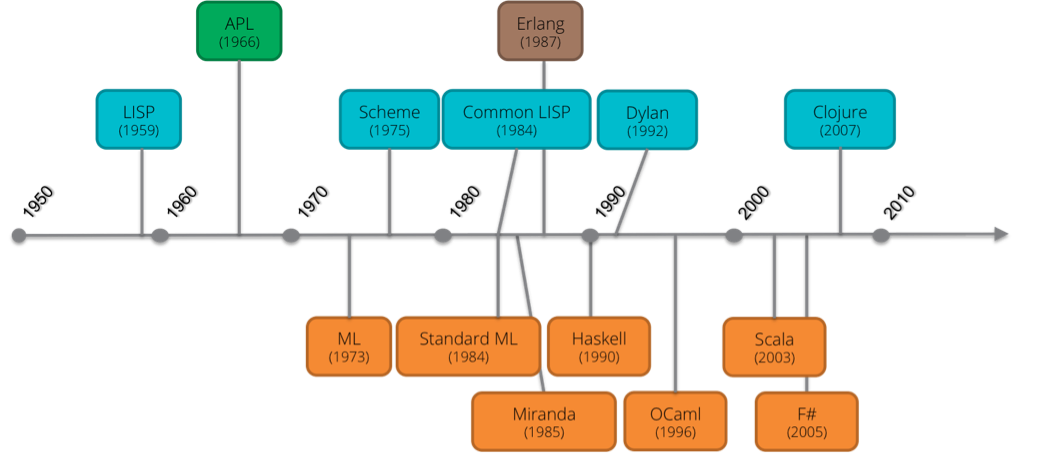

En la “Conferencia sobre Lenguajes de Programación Funcional y Arquitecturas de Ordenador” aparecio la idea un lenguaje funcional estandarizado y libre. 

[<img src="https://imgs.xkcd.com/comics/standards.png">]()

Haskell lleva ese nombre en honor al matemático Haskell Curry, quien hizo grandes aportes al concepto de Currying.

[<img src="http://s3.amazonaws.com/lyah/curry.png">]()

# Currying
Es la aplicacion parcial de funciones. Todas las funciones toman un solo parametro.

In [7]:
ejemplo :: (Integral a) =>  a -> a -> a
ejemplo a b = a*b

print $ ejemplo 2 3

mult2 = ejemplo 2
print $ mult2 3
print $ mult2 4

6

6

8

# Features
* Purity
* Laziness
* Strong typing
* Memory managed
* Elegance
* Modular

## Listas infinitas?

In [22]:
pares = [2,4..]
print $ take 50 pares

[2,4,6,8,10,12,14,16,18,20]

* Equivalente C:

```C
for(int i=1;i<=50;printf("%d, ",i*2));
```

* Equivalente Python:

```Python
print " ".join([str(x*2) for x in range(51)])
```

* Listas infinitas en python:
```Python
def pares():
    i = 2
    while True:
        yield i
        i += 2
```

## List comprehensions

In [8]:
print [x | x <- [1..50], (x `mod` 2) /= 1]

[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50]

## Pattern matching

In [14]:
valor :: Int -> String
valor 1 = "Uno"
valor 2 = "Dos"
valor 3 = "Tres"
valor x = "No se"

print $ valor 1
print $ valor 2
print $ valor 3
print $ valor 1000

"Uno"

"Dos"

"Tres"

"No se"

In [2]:
fibonacci :: Int -> Int
fibonacci 0 = 0
fibonacci 1 = 1
fibonacci x = fibonacci (x-1) + fibonacci (x-2) 

fibonacci 10

55

## Guards

In [25]:
esPar :: (Integral a) => a -> Bool
esPar x
    | x `mod` 2 == 0 = True
    | otherwise = False

print $ esPar 5
print $ esPar 8

False

True

## Let it be

In [26]:
5 * (let z = 9 in z + 1) + 2

52

## High Order Functions

In [21]:
map' :: (a -> b) -> [a] -> [b]
map' _ [] = []
map' f (x:xs) = f x : map' f xs

map' (+3) [1,2,3,4]
map' (\x -> x+1) [1,2,3,4]

Line 1: Avoid lambda
Found:
\ x -> x + 1
Why not:
(+ 1)

[4,5,6,7]

[2,3,4,5]

## Composicion de funciones

In [4]:
f1 :: (Integral a) => a -> a
f1 x = x * 5

f2 :: (Integral a) => a -> a
f2 x = x * 10

f3 :: (Integral a) => a -> a
f3 x = x + 1

(f1 . f2 . f3) 1
(f3 . f2 . f1) 1

map (negate . abs) [5,-3,-6,7,-3,2,-19,24]

sum $ map (abs . sum) [[-2,-1],[0],[1,2]]

100

51

[-5,-3,-6,-7,-3,-2,-19,-24]

6

## Excepciones

In [13]:
import System.Environment  
import System.IO  
import System.IO.Error  
import Control.Exception

In [17]:
main :: String -> IO()
main file = toTry file `catch` handler  
              
toTry :: String -> IO ()  
toTry file = do  
           contents <- readFile file  
           putStrLn $ "The file has " ++ show (length (lines contents)) ++ " lines!"  
  
handler :: IOError -> IO ()  
handler e  
    | isDoesNotExistError e = putStrLn "The file doesn't exist!"  
    | otherwise = ioError e  

In [19]:
main "QueryResultsHaskell.csv"
main "fafafa.csv"

The file has 3123 lines!

The file doesn't exist!

# Memory allocation

> Most objects die young

Hipotesis generacional

### Garbage collector
* stop-the-world
* paralelo
* generacional 
* copiado

"Nursery" de 512kB

[<img src="https://davidterei.com/talks/2011-11-cs240h/gc.png">]()

## GHC : Concurrencia

In [148]:
import Control.Concurrent (forkIO, threadDelay)
import Text.Printf
import Control.Concurrent
import Control.Monad (replicateM_)
    
fact :: (Integral a) => a -> a
fact 0 = 1
fact x = x * fact (x-1)

printFact stdout x = do
    let r = show $ fact x
    putMVar stdout ((show x) ++ "! = " ++ r)

main = do
    let values = map (+10) [1..8]
    stdout <- newEmptyMVar
    mapM_ (forkIO . printFact stdout) values
    printRes (length values) stdout
    
printRes i var = replicateM_ i (takeMVar var >>= putStrLn)
    
main

14! = 87178291200
15! = 1307674368000
16! = 20922789888000
17! = 355687428096000
18! = 6402373705728000
12! = 479001600
13! = 6227020800
11! = 39916800

In [137]:
:t show $ fact 4

show $ fact 4 :: String

# Casos de uso

[<img src="https://raw.githubusercontent.com/facebook/Haxl/master/logo.png">]()

El servicio Sigma es el responsable de clasificar contenido en Facebook como sospechoso de spam o contenido peligroso. Actualmente se basa en una implementacion open source de una biblioteca llamada Haxl.

[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Elm_logo.svg/240px-Elm_logo.svg.png" width="250">](Elm)

El compilador del lenguaje Elm esta desarrollado en Haskell.

[<img src="https://d21buns5ku92am.cloudfront.net/46049/images/150798-Chordify%C2%AE_logo_100%25_green-9ea4b6-medium-1417728929.jpg" width="250">](Chordify)

Chordify es un servicio online que transforma musica en acordes.

[<img src="http://www.ganeti.org/images/ganeti-logo.png" width="250">](Ganeti)

Ganeti es una herramienta desarrollada por Google para el manejo de clusters de servidores virtuales.

[<img src="https://a1.nyt.com/assets/homepage/20171018-133349/images/foundation/logos/nyt-logo-379x64.png" width="250">](NYT)

El New York Times usa una bibliotecca de Haskell para procesar imagenes desde 2013. Su decision se baso en la presencia de paquetes de alta performance de arreglos numericos y su facilidad de paralelizacion. 

# Lenguajes inspirados por Haskell

[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Elm_logo.svg/240px-Elm_logo.svg.png" width="250">]()

[<img src="http://www-ps.informatik.uni-kiel.de/currywiki/_media/curry_2.png" width="250">]()

[<img src="http://taylor.fausak.me/static/images/2015/10/22/purescript.svg"  width="250">]()

# Uso Academico

### Argentina

| Universidad/Facultad       | Lenguaje      |
| ------------- |:-------------:|
| FCEyN      | Haskell, Algoritmos I |
| FIUBA      | Lisp, Formales |
| FIUBA      | Oz, TDL |
| UTN      | Haskell, IA |
| UNLP      | ? |
| UNQUI      | Haskell, PF |

### US

| College       | Lenguaje      | Tipo de clase  |
| ------------- |:-------------:| -----:|
| CMU      | ML | Programacion |
| MIT      |       |    |
| Stanford | Haskell      |    Programacion |
| Berkeley |       |     |
| UIUC | OCaml      |    PL/Compilers |
| Cornell | OCaml      |    PL/Compilers |
| Washington | SML, Racket      |    PL |
| Princeton | OCaml      |    Programacion |
| Georgia Tech |       |     |
| UT Austin |       |     |
| CalTech | Scheme      |    Programacion |
| Wisconsin |       |     |
| UCLA | OCaml,Scheme      |    PL |
| Michigan |       |     |
| Columbia |  OCaml     |     PL/Compilers|
| UCSD | OCaml,Scheme      |PL     |
| Maryland | OCaml      |  Programming   |
| Harvard | OCaml      | Programming    |
| Penn | OCaml      | Programming     |
| Brown |  Scheme,ML     | Programming    |
| Rice |       |     |
| Yale |  ML     |  PL/Compilers   |
| Duke |       |     |
| NYU |       |     |
| Penn State |       |     |
| Minnesota | ML      |  Programming   |

# Github y StackOverflow

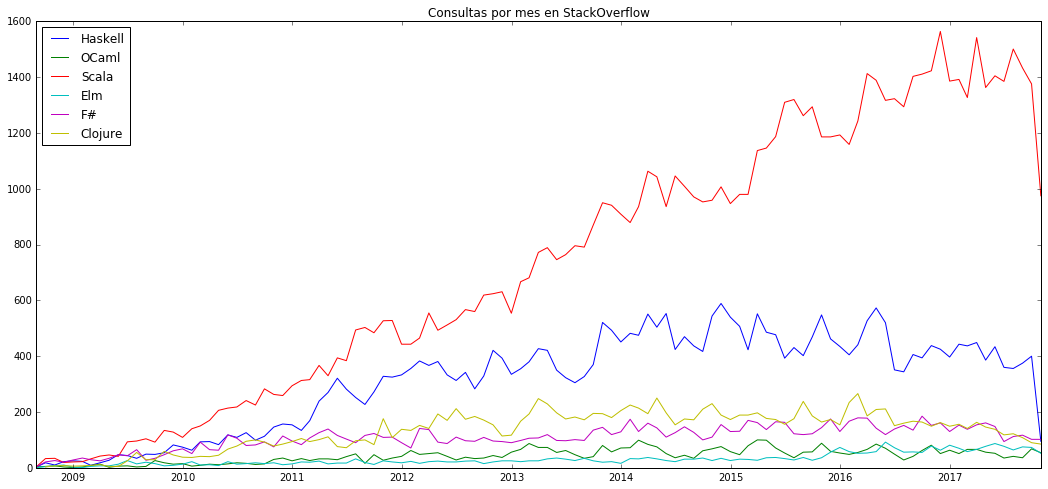
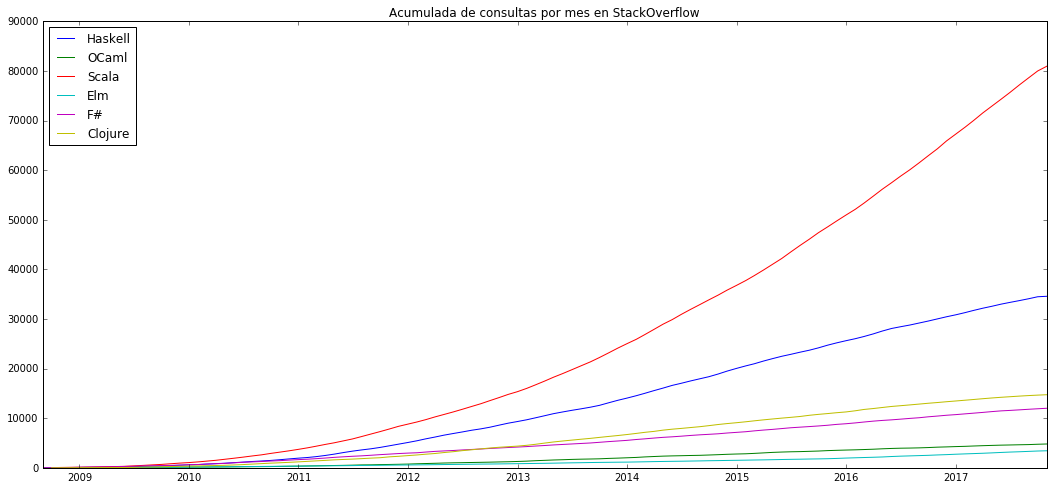
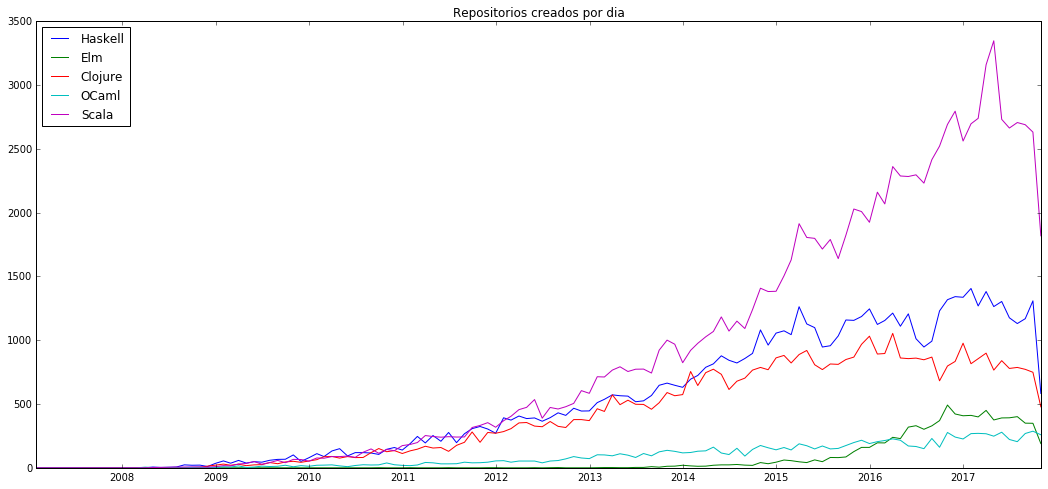
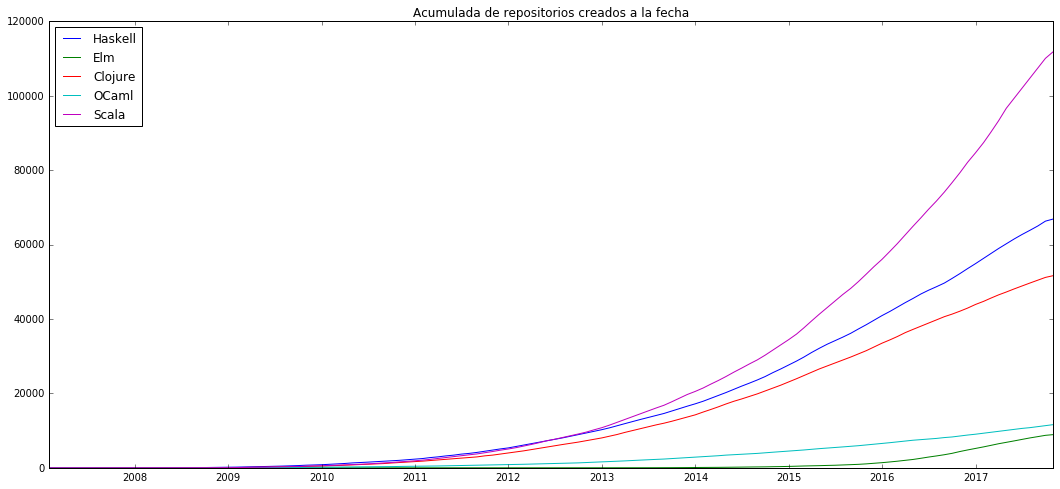